# Part 1. 크롤링과 스크레핑

In [2]:
# import library
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# adjust 한글 font
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
# plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus'] = False

# Chapter 1. Crawling & Scraping
- 근래에는 정형화된 데이터보다 비정형 자료들을 많이 분석함
- Social Network

## 빅데이터의 수집
>### 빅데이터
- 대규모의 데이터 셋 (정의의 일부)
- 데이터 수집만으로 의미 X, 데이터를 활용했을 때 가치 부여
- 기존의 Data warehouse는 정형화되어있는 자료들을 다룸 (ex) 표
    - 빅데이터는 정형화 이외의 자료도 분석의 대상으로 봄
- 빅데이터의 Definition은 가지가지
    - IBM 3V
        - 크기 (Value)
        - 속도 (Velocity)
        - 다양성 (Variety)
- 실시간으로 생성되는 자료
    - 블로그와 SNS를 이용한 트렌드 분석
    - 인터넷 전자상거래 상품 DB 분석
    - 금융 정보를 이용한 예측
    - 공공데이터를 이용한 인구, 미세먼지 등 데이터 분석

>### 스크레핑(Scaping)
- _웹 사이트의 특정 정보를 추출하는 기술_
- 공개된 정보는 대부분 HTML 형식으로 되어있어 필요한 데이터로 저장하기 위해 가공이 필요
- 이를 위해 데이터 주고를 파악하는 것이 필요
- 최근에는 로그인을 통해서만 유용한 정보에 접근할 수 있는 경우가 많다.
    - 로그인 이후 필요한 웹 페이지 접근 기술이 필요
- JS, 서버용 언어(PHP, ASP)가 중간에 끼기 때문에 접근이 어려울 수 있음

>### 크롤링(Crawling)
- _웹 사이트를 프로그램이 정기적으로 정보를 추출하는 기술_
    - 크롤링하는 프로그램을 크롤러(crawler) 또는 스파이더(spider)

>### 머신러닝에 사용할 수 있는 데이터 구조
- 머신러닝뿐만 아니라 일반적인 분석에도 마찬가지, 수집한 자료를 편집하는 과정은 필수
- 수집된 자료는 데이터의 구조를 분석하고 필요한 부분만 추출하여 분석 과정을 통해 머신러닝에 사용 가능
- 데이터 형식은 파일 또는 DB에 저장하여 활용

>### Web component : HTML, HTTP

>>### HTML
- 프로그램 언어임 (물론 일반적인 언어와는 다름)
- 태그(tag)는 꺾쇠 괄호 <>로 둘러싸여 있고, 그 안에 정보에 대한 의미를 작성
- 그 의미가 끝나는 부분에 슬래시(/)를 사용하여 해당 태그를 종료
        <title>Hello, World</title>       # 제목 요소, 값은 Hello, World
        <img src="http://tcpschool.com/lectures/img_webbasic_10.png" width="600" height="300"> # 맨 아래의 이미지 태그
        
>>### HTTP
- HTTP(Hypertext Transaction Protocol)은 인터넷에서 컴퓨터 간에 정보를 주고받을 때 사용하는 일종의 약속
- CS(Computer Science)에서 일반적으로 약속을 Protocol이라고 함

>### 웹의 동작 순서
- 웹 브라우저 실행 $\rightarrow$ 주소 정보 입력
- 주소 정보의 공식 이름은 **URL(Uniform Resource Locator)**
- 출처 : https://joshua1988.github.io/web-development/http-part1/
![title](https://joshua1988.github.io/images/posts/web/http/url-structure.png)
- URL에는 해당 서버가 위치한 인터넷 주소 정보인 Domain Name이 존재
- 흔히 도메인 정보 또는 서버 주소라고도 하는 이 주소를 통해 웹의 정보를 제공하는 서버에 접속
- 일반적으로 컴퓨터는 **인터넷 프로토콜 주소(Internet Protocol Address)**, 즉 IP 주소라고 부르는 주소 값을 가짐
    - IP 주소는 숫자로 되어있음. 이를 외우기는 쉽지 않음
    - 보통 4가지 숫자를 이용하여 구성
    - 즉, 외우기 쉽게 문자로 바꾼, domain name, URL을 사용함
- IP 주소를 컴퓨터의 주소로 생각하면 이 주소에 접속하기 위해 사용하는 도메인 네임과 연결하기 위한 도메인 네임 서버(Domain Name Server, DNS)를 운영
- 출처 : http://tcpschool.com/webbasic/works
<img src="http://tcpschool.com/lectures/img_webbasic_10.png" width="600" height="300">

## 데이터 다운로드 하기
>### 웹상의 정보를 추출하는 방법
- 웹 사이트의 텍스트를 가져오기 위해 프로그램적으로는 **Source**를 파악해야 한다.
    - 즉, 최초에 source 분석을 해야한다.
- 웹 사이트에 있는 데이터 추출을 위해 `urllib` 라이브러리 사용
    - HTTP 또는 FTP(파일을 주고 받을 수 있는 protocol)를 이용해 데이터를 다운로드
- `urllib`는 URL을 다루는 모듈을 모아놓은 패키지
    - 특히 `urllib.request` 모듈은 웹 사이트에 있는 데이터에 접근하는 기능을 제공
            urlertrieve(url, name)
                - URL 주소의 파일을 다운로드
            urlopen()
                - 곧바로 파일을 저장하지 않고 메모리상에 load
- 흔히 `a` 태그가 이동할 주소나 파일의 위치를 담고있음 (link)

In [3]:
# 다운로드
import urllib.request # 패키지 실행
url = 'http://uta.pw/shodou/img/28/214.png' # 파일을 다운로드할 주소
savename = 'test_download.png' # 저장할 파일 이름
urllib.request.urlretrieve(url, savename) # 파일 다운로드

('test_download.png', <http.client.HTTPMessage at 0x2bb8d967208>)

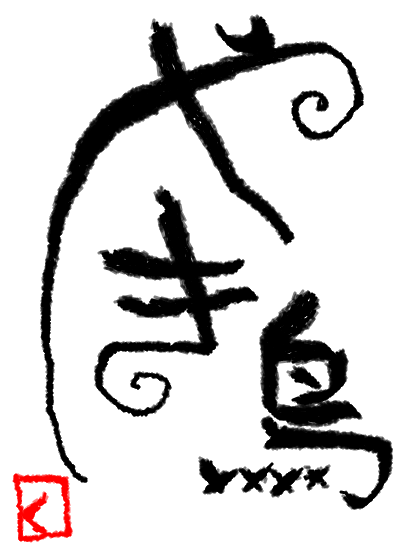

In [4]:
from PIL import Image
Image.open('test_download.png')

In [5]:
# 메모리 상에 주소를 저장
# 메모리 상에 load 후 바이너리 파일로 변환하여 파일을 저장
url = 'http://uta.pw/shodou/img/28/214.png' # 파일을 다운로드할 주소
savename = 'open_download.png' # 저장할 파일 이름
# 파일 다운로드
memory = urllib.request.urlopen(url).read() # URL 리소스를 열로 read 메소드 데이터 읽기
# 파일로 저장
with open(savename, 'wb') as f: # w 쓰기 모드, b 바이너리 모드
    f.write(memory) # 메소드로 다운로드한 바이너리 데이터를 파일로 저장

In [6]:
# 공공데이터 포털
url = 'https://www.data.go.kr/dataset/fileDownload.do?atchFileId=FILE_000000001455071&fileDetailSn=1&publicDataDetailPk=uddi:baa36625-7a28-4d54-b118-dc47ba14378c'
savename = 'gas_20180620.csv'
urllib.request.urlretrieve(url, savename) # 파일 다운로드

('gas_20180620.csv', <http.client.HTTPMessage at 0x2bba1233860>)

    절대주소 : http://www.exam.com/s/Ex.txt
    상대주소 : s/Ex.txt

In [8]:
gas = pd.read_csv(savename, encoding='cp949')
gas

,시군명,상호명,소재지,고압가스종류,데이터기준일자
0,가평군,(재)예수의꽃동네유지재단 노체리안드리아자애병원,경기도 가평군 조종면 운악리,산소,2018-06-20
1,가평군,(주)팜스코,경기도 가평군 설악면 송산리,액화천연가스,2018-06-20
2,가평군,GS칼텍스청평연구소,경기도 가평군 설악면 사룡리,LPG,2018-06-20
3,가평군,㈜꿈의동산,경기도 가평군 청평면 상천리,LPG,2018-06-20
4,가평군,㈜협신,경기도 가평군 상면 봉수리,LPG,2018-06-20
5,가평군,대교디앤에스마이다스밸리골프클럽,경기도 가평군 설악면 이천리,LPG,2018-06-20
6,가평군,세계평화통일가정연합(박물관),경기도 가평군 설악면 송산리,LPG,2018-06-20
7,가평군,아난티C.C서울클럽하우스,경기도 가평군 설악면 방일리,LPG,2018-06-20
8,가평군,아난티서울펜트하우스,경기도 가평군 설악면 방일리,LPG,2018-06-20
9,가평군,천주청평수련원,경기도 가평군 설악면 송산리,LPG,2018-06-20


>### 웹에서 데이터 추출하기
- 웹에서 XML 또는 HTML 등의 텍스트 기반 데이터를 다운로드

In [9]:
# 데이터 읽어 들이기
url = 'http://api.aoikujira.com/ip/ini' # 데이터를 가져올 주소
res = urllib.request.urlopen(url) # URL 리소스를 열기
data = res.read() # 바이너리 데이터로 읽기
print(data) # 바이너리로 출력

# 바이너리를 문자열로 변환 (HTML 소스 불러오기)
text = data.decode('utf-8') # decode aptjemfmf 
print('\n', text) # 문자열로 출력

b'[ip]\nAPI_URI=http://api.aoikujira.com/ip/get.php\nREMOTE_ADDR=115.88.249.138\nREMOTE_HOST=115.88.249.138\nREMOTE_PORT=54564\nHTTP_HOST=api.aoikujira.com\nHTTP_USER_AGENT=Python-urllib/3.6\nHTTP_ACCEPT_LANGUAGE=\nHTTP_ACCEPT_CHARSET=\nSERVER_PORT=80\nFORMAT=ini\n\n'

 [ip]
API_URI=http://api.aoikujira.com/ip/get.php
REMOTE_ADDR=115.88.249.138
REMOTE_HOST=115.88.249.138
REMOTE_PORT=54564
HTTP_HOST=api.aoikujira.com
HTTP_USER_AGENT=Python-urllib/3.6
HTTP_ACCEPT_LANGUAGE=
HTTP_ACCEPT_CHARSET=
SERVER_PORT=80
FORMAT=ini




In [10]:
# 데이터 읽어 들이기
url = 'http://fun-coding.org/crawl_basic2.html' # 데이터를 가져올 주소
res = urllib.request.urlopen(url) # URL 리소스를 열기
data = res.read() # 바이너리 데이터로 읽기

# 바이너리를 문자열로 변환 (HTML 소스 불러오기)
text = data.decode('utf-8') # decode aptjemfmf 
print(text.split('<body')[0]) # 문자열로 출력
                              # Head만 출력


    <!DOCTYPE html>
    <html>
    <head>
        <meta charset="utf-8">
        <title>웹크롤링 기본:  크롤링(crawling) 이해 및 기본 - 잔재미코딩</title>
        <meta name='title' content='웹크롤링 기본:  크롤링(crawling) 이해 및 기본 - 잔재미코딩'>
        <meta name="description" content="잔재미코딩은 IT 교육 컨텐츠와 강의 전문 연구소입니다.">
        <meta name="keywords" content='웹크롤링 기본, 크롤링(crawling) 이해 및 기본'>
        <meta name="author" content="Dave Lee">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <link rel="shortcut icon" href="style/images/favicon.png">
        <link href="style/css/bootstrap.css" rel="stylesheet">
        <link href="style/css/settings.css" rel="stylesheet">
        <link href="style/css/owl.carousel.css" rel="stylesheet">
        <link href="style/js/google-code-prettify/prettify.css" rel="stylesheet">
        <link href="style/js/fancybox/jquery.fancybox.css" rel="stylesheet" type="text/css" media="all" />
        <link href="style/js/fancybox/helpers/jquery.fancybox-t

>### 매개변수를 추가해 요청을 전송하는 방법
- URL에 매개변수를 추가해 요청을 전손
- 기상청 RSS 서비스
    - http://www.weather.go.kr/weather/lifenindustry/service_rss.jsp
    - http://www.weather.go.kr/weather/forecast/mid-term-rss3.jsp?stnld=108
         - ? 다음의 stnld=108가 매개변수
- URL 끝부분에 ?를 입력하고 \<key\>=\<value\> 형식으로 매개변수 입력
- 여러 개의 매개 변수인 경우, &를 사용하여 구분
    - https://www.data.go.kr/search/index.do?
          query : (index=OPENAPI) & (query=%EA%B4%80%EA%B4%91) & (currentPage=3) & (countPerPage=5)

`urllib.parse.urlencode()`
- 굉장히 중요
- 한글을 parsing해줌

In [11]:
import urllib.request # 패키지 실행
import urllib.parse # 패키지 실행
# 데이터 읽기
API = 'http://www.weather.go.kr/weather/forecast/mid-term-rss3.jsp' # 매개변수를 URL 인코딩
# 매개변수(딕셔너리 자료형)을 URL 인코딩
value = {'stnld' : '108'}
params = urllib.parse.urlencode(value) # 매개변수를 URL 인코딩
print(params)

# 요청 URL 생성
url = API + '?' + params # URL 리소스 열기
print('url={0}'.format(url))

# 다운로드
res = urllib.request.urlopen(url) # URL 리소스 열기
data = res.read() # 바이너리 데이터로 읽기

# 바이너리를 문자열로 변환 (HTML 소스 불러오기)
text = data.decode('utf-8')
print(text.split('<body')[0]) # 문자열로 출력
                              # Header만 출력

stnld=108
url=http://www.weather.go.kr/weather/forecast/mid-term-rss3.jsp?stnld=108
<?xml version="1.0" encoding="utf-8" ?>
<rss version="2.0">
<channel>
<title>기상청 육상 중기예보</title>
<link>http://www.kma.go.kr/weather/forecast/mid-term_01.jsp</link>
<description>기상청 날씨 웹서비스</description>
<language>ko</language>
<generator>기상청</generator>
<pubDate>2019년 07월 01일 (월)요일 06:00</pubDate>
 <item>
<author>기상청</author>
<category>육상중기예보</category>
<title>전국 육상 중기예보 - 2019년 07월 01일 (월)요일 06:00 발표</title>
<link>http://www.kma.go.kr/weather/forecast/mid-term_01.jsp</link>
<guid>http://www.kma.go.kr/weather/forecast/mid-term_01.jsp</guid>
<description>
	<header>
		<title>전국 육상중기예보</title>
		<tm>201907010600</tm>
		<wf><![CDATA[장마전선의 영향으로 6~7일에 남부지방과 제주도에 비가 오겠습니다.  <br />그 밖의 날은 고기압의 영향으로 맑은 날이 많겠습니다.<br />기온은 평년(최저기온: 18~22℃, 최고기온: 25~30℃) 보다 4~5일에는 조금 높겠고, 그 밖의 날은 비슷하겠습니다.<br />강수량은 평년(5~18mm)보다 남부지방과 제주도는 많겠고, 중부지방은 적겠습니다.<br /><br />* 한편, 장마전선은 6일부터 제주도남쪽먼바다에서 다시 북상할 것으로 예상되나, 북태평양고기압의 확장 정도에 따라 장

>### 매개변수를 명령줄에서 지정하기
- 앞선 프로그램에서는 매개변수를 코드에서 입력해야 하므로 다른 지역은 매개변수를 지정하려면 프로그램을 수정
- 명령줄에서 바로 지역번호를 입력하여 사용

In [12]:
# 라이브러리 호출
import sys
import urllib.request as req
import urllib.parse as parse

# 입력줄 매개변수 추출
text = [] # 문서를 저장할 리스트 초기화
while True:
    # 입력줄을 이용하여 지역번호 입력
    region_number = input('Usage : download-forecast-argv : ')
    
    # 반복구문 졸료 조건
    if region_number.upper() == 'EXIT':
        break
    elif int(region_number) not in [108, 109, 105, 131, 133, 146, 156, 134, 159, 184]:
        continue
    
    # 매개변수를 URL 인코딩(한글을 포함하는 경우 필수로 실행)
    API = 'http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp'
    
    values = {'stnld' : region_number}
    params = parse.urlencode(values)
    url = API + '?' + params
    print('URL=', url)
    
    # 페이지 다운로드
    data = req.urlopen(url).read()
    text.append(data.decode('utf-8'))

Usage : download-forecast-argv : 104
Usage : download-forecast-argv : 105
URL= http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp?stnld=105
Usage : download-forecast-argv : 159
URL= http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp?stnld=159
Usage : download-forecast-argv : exit


## BeautifulSoup으로 scraping하기
>### BeautifulSoup으로 scraping
- 스크레핑이란 웹 사이트에서 데이터를 추출하여 원하는 정보를 얻어내는 것
- 파이썬에서 스크레핑할 때 빼놓을 수 없는 라이브러리, BeautifulSoup
        pip install beautifulsoup4
    - BeautifulSoup을 HTML과 XML에서 정보 추출이 가능
    - HTML과 XML 분석을 해주는 라이브러리
    - 자체로 다운로드 기능은 없음
- HTML 구조로 요소를 추출 `BeautifulSoup()` 함수 사용
    - HTML 구조로 요소를 추출하는 것, HTML 구조를 하나하나 적어나가는 것은 매우 복잡
    - 간단하게 요소를 찾아내는 방법이 필요
        <table>
          <thead>
            <tr>
              <th>markup parser</th>
              <th>설명</th>
            </tr>
          </thead>
          <tbody>
            <tr>
              <td><code class="highlighter-rouge">html.parser</code></td>
              <td>기본옵션으로 빠르지만 유연하지 못함 (단순하 html 문서에서 사용)</td>
            </tr>
            <tr>
              <td><code class="highlighter-rouge">lxml</code></td>
              <td>매우 빠르고 유연</td>
            </tr>
            <tr>
              <td><code class="highlighter-rouge">xml</code></td>
              <td>XML 파일에만 사용</td>
            </tr>
            <tr>
              <td><code class="highlighter-rouge">html5lib</code></td>
              <td>매우 느리지만 유연 (구조가 복잡한 HTML 문서에 사용)</td>
            </tr>
          </tbody>
        </table>

In [13]:
# 라이브러리 호출
from bs4 import BeautifulSoup

# 분석할 HTML
html = """
<html><body>
<h1>스크레핑이란?</h1>
<p>웹 페이지를 분석하는 것</p>
<p>원하는 부분을 추출하는 것</p>
</body></html>
"""
# HTML 분석하기
soup = BeautifulSoup(html, 'html.parser') # BeautifulSoup 객체 생성
print(soup, '\n')
print(soup.prettify(), '\n')

# 원하는 부분 추출
h1 = soup.html.body.h1 # HTML 태그 구조를 이용하여 접근
p1 = soup.html.body.p
p2 = p1.next_sibling.next_sibling # nest_sibling 첫 번째 p태그 다음 공백 줄바꿈 문자
                                  # next_sibling 두 번째 p태그
print(p1) # p1 tag
print(p1.next_sibling) # \n
print(p1.next_sibling.next_sibling) # p2 tag

# 요소의 글자 출력
print('h1 = {0}'.format(h1.string))
print('p1 = {0}'.format(p1.string))
print('p2 = {0}'.format(p2.string))


<html><body>
<h1>스크레핑이란?</h1>
<p>웹 페이지를 분석하는 것</p>
<p>원하는 부분을 추출하는 것</p>
</body></html>
 

<html>
 <body>
  <h1>
   스크레핑이란?
  </h1>
  <p>
   웹 페이지를 분석하는 것
  </p>
  <p>
   원하는 부분을 추출하는 것
  </p>
 </body>
</html>
 

<p>웹 페이지를 분석하는 것</p>


<p>원하는 부분을 추출하는 것</p>
h1 = 스크레핑이란?
p1 = 웹 페이지를 분석하는 것
p2 = 원하는 부분을 추출하는 것


In [14]:
P1 = soup.body.p
p1, P1

(<p>웹 페이지를 분석하는 것</p>, <p>웹 페이지를 분석하는 것</p>)

In [15]:
soup.body.p.previous_sibling # 줄바꿈 문자를 읽어와보리기~

'\n'

>### id로 요소를 찾는 방법
- id 속성을 지정하여 요소를 찾는 `find()` 메서드를 제공
        find(tag_name, attrs={}) 메서드를 사용

- HTML_Exam.html
```
﻿<!DOCTYPE html>
<html>
	<head>
		<title>Page title</title>
	</head>
	<body>
    	<div>
            <p>a</p>
            <p>b</p>
            <p>c</p>
        </div>
        <div class="ex_class">
            <p>d</p>
            <p>e</p>
            <p>f</p>
        </div>
        <div id="ex_id">
            <p>g</p>
            <p>h</p>
            <p>i</p>
        </div>
		<h1>This is a heading</h1>
		<p>This is a paragraph.</p>
		<p>This is another paragraph.</p>
	</body>
</html>
```
<html>
	<head>
		<title>Page title</title>
	</head>
	<body>
    	<div>
            <p>a</p>
            <p>b</p>
            <p>c</p>
        </div>
        <div class="ex_class">
            <p>d</p>
            <p>e</p>
            <p>f</p>
        </div>
        <div id="ex_id">
            <p>g</p>
            <p>h</p>
            <p>i</p>
        </div>
		<h1>This is a heading</h1>
		<p>This is a paragraph.</p>
		<p>This is another paragraph.</p>
	</body

In [16]:
# 파일 열기
fp = open('C:/workspace/KSA\data/modeule04/ch01/HTML_Exam.html', 'r',
         encoding='utf-8')

soup = BeautifulSoup(fp, 'html.parser') # BeautifulSoup 객체 생성
divs = soup.find('div') # div 태그
divs_class = soup.find('div', class_='ex_class') # div 태그, class
divs_id = soup.find('div', id='ex_id') # div 태그, id
p = soup.find('p') # p 태그
print('*** div 태그\n{0}'.format(divs), '\n')
print('*** div 태그, class=ex_class\n{0}'.format(divs_class), '\n')
print('*** div 태그, id=ex_id\n{0}'.format(divs_id), '\n')
print('*** p 태그\n{0}'.format(p))

fp.close()

*** div 태그
<div>
<p>a</p>
<p>b</p>
<p>c</p>
</div> 

*** div 태그, class=ex_class
<div class="ex_class">
<p>d</p>
<p>e</p>
<p>f</p>
</div> 

*** div 태그, id=ex_id
<div id="ex_id">
<p>g</p>
<p>h</p>
<p>i</p>
</div> 

*** p 태그
<p>a</p>


In [17]:
divs

<div>
<p>a</p>
<p>b</p>
<p>c</p>
</div>

In [18]:
divs.text, divs.string

('\na\nb\nc\n', None)

In [19]:
p.next_sibling.next_sibling.next_sibling.next_sibling # div 태그 이하로는 내려가지 않음

<p>c</p>

In [20]:
soup.body.div.next_sibling.next_sibling.next_sibling.next_sibling.p.next_sibling.next_sibling # 너무 복잡한디....

<p>h</p>

>- 여러 개의 요소 추출하기
        find_all(tag_name, attrs={}) 메서드 사용

In [21]:
# 파일 열기
fp = open('C:/workspace/KSA\data/modeule04/ch01/HTML_Exam.html', 'r',
         encoding='utf-8')

soup = BeautifulSoup(fp, 'html.parser') # BeautifulSoup 객체 생성
divs = soup.find_all('div') # 모든 div 태그
print('*** div 태그\n{0}'.format(divs))
fp.close()

*** div 태그
[<div>
<p>a</p>
<p>b</p>
<p>c</p>
</div>, <div class="ex_class">
<p>d</p>
<p>e</p>
<p>f</p>
</div>, <div id="ex_id">
<p>g</p>
<p>h</p>
<p>i</p>
</div>]


>- 온라인 파일 열기

In [22]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

# 온라인 파일 열기
url = urlopen('http://www.naver.com')
soup = BeautifulSoup(url, 'html.parser')
a = soup.find_all('a', class_='ah_da') # 모든 a 태그, class='ah_da'
print('*** a 태그, class="ah_da"\n{0}'.format(a))

*** a 태그, class="ah_da"
[<a class="ah_da" data-clk="lve.kwdhistory" href="http://datalab.naver.com/keyword/realtimeDetail.naver?datetime=2019-07-01T18:08:00&amp;query=%EC%86%A1%EC%A4%91%EA%B8%B0+%ED%83%88%EB%AA%A8%EC%82%AC%EC%A7%84&amp;where=main">
<span class="blind">데이터랩 그래프 보기</span>
<span class="ah_ico_datagraph"></span>
</a>, <a class="ah_da" data-clk="lve.kwdhistory" href="http://datalab.naver.com/keyword/realtimeDetail.naver?datetime=2019-07-01T18:08:00&amp;query=%EB%B0%98%EB%A0%A4%EB%8F%99%EB%AC%BC+%EB%93%B1%EB%A1%9D&amp;where=main">
<span class="blind">데이터랩 그래프 보기</span>
<span class="ah_ico_datagraph"></span>
</a>, <a class="ah_da" data-clk="lve.kwdhistory" href="http://datalab.naver.com/keyword/realtimeDetail.naver?datetime=2019-07-01T18:08:00&amp;query=%EC%8B%9C%EB%AA%AC%EC%8A%A4+%EC%9B%A8%EB%94%A9+%ED%94%84%EB%A1%9C%EB%AA%A8%EC%85%98&amp;where=main">
<span class="blind">데이터랩 그래프 보기</span>
<span class="ah_ico_datagraph"></span>
</a>, <a class="ah_da" data-clk="lve.kwdhistory

In [54]:
# tag = soup.find_all('div', class_='api_atcmp_wrap _keywords', style="display:none;")
tag = soup.find_all('div', {'class':'api_atcmp_wrap _keywords', 'style':"display:none;"}) # dict로 넣을 땐 class

In [24]:
# 온라인 파일 열기
url = urlopen('http://www.weather.go.kr/weather/forecast/mid-term-rss3.jsp')
soup = BeautifulSoup(url, 'html.parser')
title = soup.find('title').string # title tag
wf = soup.find('wf') # wf 태그
print('Title\n{0}'.format(title))
print('wf{0}'.format(wf))

Title
기상청 육상 중기예보
wf<wf><![CDATA[장마전선의 영향으로 6~7일에 남부지방과 제주도에 비가 오겠습니다.  <br />그 밖의 날은 고기압의 영향으로 맑은 날이 많겠습니다.<br />기온은 평년(최저기온: 18~22℃, 최고기온: 25~30℃) 보다 4~5일에는 조금 높겠고, 그 밖의 날은 비슷하겠습니다.<br />강수량은 평년(5~18mm)보다 남부지방과 제주도는 많겠고, 중부지방은 적겠습니다.<br /><br />* 한편, 장마전선은 6일부터 제주도남쪽먼바다에서 다시 북상할 것으로 예상되나, 북태평양고기압의 확장 정도에 따라 장마전선의 위치와 강수 영역이 달라질 수 있으니, 앞으로 발표되는 기상정보를 참고하기 바랍니다.<br />* 내륙지역을 중심으로 낮 기온이 30도 이상 올라 덥겠으니, 보건, 축산 등 폭염피해에 유의하기 바랍니다.]]></wf>


In [25]:
# 온라인 파일 열기
url = urlopen('http://www.weather.go.kr/weather/forecast/mid-term-rss3.jsp')
soup = BeautifulSoup(url, 'html.parser')
title = soup.find('title').string # title tag
wf = soup.find_all('wf') # 모든 wf 태그
print('Title\n{0}'.format(title))
for ix, x in enumerate(wf):
    if ix > 40:
        break
    text = x.string # wf tag 하나의 문자열
    print('wf : {0}'.format(text))

Title
기상청 육상 중기예보
wf : 장마전선의 영향으로 6~7일에 남부지방과 제주도에 비가 오겠습니다.  <br />그 밖의 날은 고기압의 영향으로 맑은 날이 많겠습니다.<br />기온은 평년(최저기온: 18~22℃, 최고기온: 25~30℃) 보다 4~5일에는 조금 높겠고, 그 밖의 날은 비슷하겠습니다.<br />강수량은 평년(5~18mm)보다 남부지방과 제주도는 많겠고, 중부지방은 적겠습니다.<br /><br />* 한편, 장마전선은 6일부터 제주도남쪽먼바다에서 다시 북상할 것으로 예상되나, 북태평양고기압의 확장 정도에 따라 장마전선의 위치와 강수 영역이 달라질 수 있으니, 앞으로 발표되는 기상정보를 참고하기 바랍니다.<br />* 내륙지역을 중심으로 낮 기온이 30도 이상 올라 덥겠으니, 보건, 축산 등 폭염피해에 유의하기 바랍니다.
wf : 맑음
wf : 맑음
wf : 맑음
wf : 맑음
wf : 구름많음
wf : 구름많음
wf : 구름많음
wf : 구름많음
wf : 맑음
wf : 맑음
wf : 구름많음
wf : 맑음
wf : 맑음
wf : 맑음
wf : 맑음
wf : 맑음
wf : 맑음
wf : 구름많음
wf : 구름많음
wf : 구름많음
wf : 구름많음
wf : 맑음
wf : 맑음
wf : 구름많음
wf : 맑음
wf : 맑음
wf : 맑음
wf : 맑음
wf : 맑음
wf : 맑음
wf : 구름많음
wf : 구름많음
wf : 구름많음
wf : 구름많음
wf : 맑음
wf : 맑음
wf : 구름많음
wf : 맑음
wf : 맑음
wf : 맑음


>### CSS(Cascading Style Sheets) 선택자
- CSS는 웹 문서의 전반적인 스타일을 미리 저장해 둔 스타일시트로 문서 전체의 일관성을 유지할 수 있고, 세세한 스타일 지정의 필요를 줄어들게 함
- CSS 선택자를 지정해서 원하는 요소를 추출. `soup = bs4.BeautifulSoup(html, 'html.parser')` 일 때,
    <table>
      <thead>
        <tr>
          <th>메서드</th>
          <th>설명</th>
        </tr>
      </thead>
      <tbody>
        <tr>
          <td><code class="highlighter-rouge">soup.select_one(<선택자>)</code></td>
          <td>CSS 선택자로 요소 하나를 추출</td>
        </tr>
        <tr>
          <td><code class="highlighter-rouge">soup.select(<선택자>)</code></td>
          <td>CSS 선택자로 요소 여러 개를 리스트로 추출</td>
        </tr>
      </tbody>
    </table>

- CSS_Exam.html
```
<!DOCTYPE html>
<html>
<head>
    <meta charset="utf-8" />
    <meta name="keywords" content="CSS, HTML" />
    <meta name="viewport" content="width=device-width, initial-scale=1.0" />
        <title>CSS 선택자</title>
</head>
<body>
	<div id="meigen">
		<h1>파이썬 프로그램</h1>
		<ul class="items">
			<li><a href="/Python/Basics">Python 기초</a></li>
			<li><a href="/Python/Gui">GUI 프로그래밍</a></li>
			<li><a href="/Python/Data">Python 데이타</a></li>
			<li><a href="/Python/Django">Django 기초</a></li>
			<li><a href="/Python/Applications">Python 활용</a></li>
			<li><a href="/Python/Tips">Python 팁</a></li>
			<li><a href="/Home/Contact">Contact</a></li>
			<li><a href="javascript:showSearch()"><i class="fa fa-search" aria-hidden="true"></i>검색</a></li>
		</ul>
	</div>
</body>
</html>
```
<!DOCTYPE html>
<html>
<head>
    <meta charset="utf-8" />
    <meta name="keywords" content="CSS, HTML" />
    <meta name="viewport" content="width=device-width, initial-scale=1.0" />
        <title>CSS 선택자</title>
</head>
<body>
	<div id="meigen">
		<h1>파이썬 프로그램</h1>
		<ul class="items">
			<li><a href="/Python/Basics">Python 기초</a></li>
			<li><a href="/Python/Gui">GUI 프로그래밍</a></li>
			<li><a href="/Python/Data">Python 데이타</a></li>
			<li><a href="/Python/Django">Django 기초</a></li>
			<li><a href="/Python/Applications">Python 활용</a></li>
			<li><a href="/Python/Tips">Python 팁</a></li>
			<li><a href="/Home/Contact">Contact</a></li>
			<li><a href="javascript:showSearch()"><i class="fa fa-search" aria-hidden="true"></i>검색</a></li>
		</ul>
	</div>
</body>
</html>

In [26]:
# 라이브러리 호출
from bs4 import BeautifulSoup

# 파일 열기
fp = open('C:/workspace/KSA\data/modeule04/ch01/CSS_Exam.html', 'r',
         encoding='utf-8')

soup = BeautifulSoup(fp, 'html.parser') # BeautifulSoup 객체 생성

# tag = soup.body.div.h1
# tag = soup.find('div', id='meigen').h1 # 뭔가 요소가 많음!

# CSS query로 추출하기
# 제목 부분 추출하기

h1 = soup.select_one('div#meigen > h1').string
print('h1={0}'.format(h1))

# 목록 부분 추출
li_list = soup.select('div#meigen > ul.items > li') # '#'다음에는 id, '.'다음에는 class
# li_list = soup.select('div#meigen > ul > li') # items 안넣어도 현재는 무방
print('li_list =')
for content in li_list:
    print(content.prettify(), end='')

print([i.string for i in li_list])
fp.close()

h1=파이썬 프로그램
li_list =
<li>
 <a href="/Python/Basics">
  Python 기초
 </a>
</li>
<li>
 <a href="/Python/Gui">
  GUI 프로그래밍
 </a>
</li>
<li>
 <a href="/Python/Data">
  Python 데이타
 </a>
</li>
<li>
 <a href="/Python/Django">
  Django 기초
 </a>
</li>
<li>
 <a href="/Python/Applications">
  Python 활용
 </a>
</li>
<li>
 <a href="/Python/Tips">
  Python 팁
 </a>
</li>
<li>
 <a href="/Home/Contact">
  Contact
 </a>
</li>
<li>
 <a href="javascript:showSearch()">
  <i aria-hidden="true" class="fa fa-search">
  </i>
  검색
 </a>
</li>
['Python 기초', 'GUI 프로그래밍', 'Python 데이타', 'Django 기초', 'Python 활용', 'Python 팁', 'Contact', None]


In [27]:
li_list

[<li><a href="/Python/Basics">Python 기초</a></li>,
 <li><a href="/Python/Gui">GUI 프로그래밍</a></li>,
 <li><a href="/Python/Data">Python 데이타</a></li>,
 <li><a href="/Python/Django">Django 기초</a></li>,
 <li><a href="/Python/Applications">Python 활용</a></li>,
 <li><a href="/Python/Tips">Python 팁</a></li>,
 <li><a href="/Home/Contact">Contact</a></li>,
 <li><a href="javascript:showSearch()"><i aria-hidden="true" class="fa fa-search"></i>검색</a></li>]

>### 네이버 금융에서 환율 정보 추출
- https://finance.naver.com/marketindex/

In [28]:
url = urlopen('https://finance.naver.com/marketindex/')

soup = BeautifulSoup(url, 'html.parser', from_encoding='cp949')
h2 = soup.select_one('div.title > h2.h_market1 > span').string
print('*** {0} ***'.format(h2))

title = soup.select_one('h3.h_lst > span.blind').string
val  = soup.select_one('div.head_info > span.value').string
print('{0}={1}\n'.format(title, val))

title_list = soup.select('h3.h_lst > span.blind')
val_list = soup.select('div.head_info > span.value')
n = len(title_list)
for i in range(0, n):
    print('{0} : {1}'.format(title_list[i].string, 
                             val_list[i].string))

*** 환전 고시 환율 ***
미국 USD=1,162.50

미국 USD : 1,162.50
일본 JPY(100엔) : 1,073.95
유럽연합 EUR : 1,317.29
중국 CNY : 169.83
일본 엔/달러 : 107.8900
달러/유로 : 1.1389
달러/영국파운드 : 1.2695
달러인덱스 : 95.6600
WTI : 58.47
휘발유 : 1496.64
국제 금 : 1409.7
국내 금 : 51905.16


- 유니코드
 - https://soooprmx.com/archives/4912
 - https://ourcstory.tistory.com/78

>### CSS 선택자로 지정할 수 있는 서식
- 기본서식
    <table>
      <thead>
        <tr>
          <th>서식</th>
          <th>설명</th>
        </tr>
      </thead>
      <tbody>
        <tr>
          <td><code class="highlighter-rouge">*</code></td>
          <td>모든 요소 선택</td>
        </tr>
        <tr>
          <td><code class="highlighter-rouge"><요소이름></code></td>
          <td>요소 이름 기반으로 선택</td>
        </tr>
        <tr>
          <td><code class="highlighter-rouge">.<클래스이름></code></td>
          <td>클래스 이름 기반으로 선택</td>
        </tr>
        <tr>
          <td><code class="highlighter-rouge">#&lt;id 이름&gt;</code></td>
          <td>id 속성 기반으로 선택</td>
        </tr>
      </tbody>
    </table>
- 선택자들의 관계를 지정하는 서식
    <table>
      <thead>
        <tr>
          <th>서식</th>
          <th>설명</th>
        </tr>
      </thead>
      <tbody>
        <tr>
          <td><code class="highlighter-rouge"><선택자>, <선택자></code></td>
          <td>쉼표로 구분된 여러 개의 선택자를 모두 선택</td>
        </tr>
        <tr>
          <td><code class="highlighter-rouge"><선택자> <선택자></code></td>
          <td>앞 선택자의 후손 중 뒤 선택자에 해당하는 것을 모두 선택</td>
        </tr>
        <tr>
          <td><code class="highlighter-rouge"><선택자> > <선택자></code></td>
          <td>앞 선택자의 자손 중 뒤 선택자에 해당하는 것을 모두 선택</td>
        </tr>
        <tr>
          <td><code class="highlighter-rouge"><선택자> + <선택자></code></td>
          <td>감은 계증에서 바로 뒤에 있는 요소를 선택</td>
        </tr>
        <tr>
          <td><code class="highlighter-rouge"><선택자1> ~ <선택자2></code></td>
          <td>선택자 1부터 선택자 2까지의 요소를 모두 선택</td>
        </tr>
      </tbody>
    </table>
- 선택자 속성을 기반으로 지정하는 서식
    <table>
      <thead>
        <tr>
          <th>서식</th>
          <th>설명</th>
        </tr>
      </thead>
      <tbody>
        <tr>
          <td><code class="highlighter-rouge"><요소>[<속성>]</code></td>
          <td>해당 속성을 가진 요소를 선택</td>
        </tr>
        <tr>
          <td><code class="highlighter-rouge"><요소>[<속성>=<값>]</code></td>
          <td>해당 속성의 값이 지정한 값과 같은 요소를 선택</td>
        </tr>
        <tr>
          <td><code class="highlighter-rouge"><요소>[<속성>~=<값>]</code></td>
          <td>해당 속성의 값이 지정한 값을 단어로 포함하고 있다면 선택</td>
        </tr>
        <tr>
          <td><code class="highlighter-rouge"><요소>[<속성>|=<값>]</code></td>
          <td>해당 속성의 값으로 시작하면 선택</td>
        </tr>
        <tr>
          <td><code class="highlighter-rouge"><요소>[<속성>^=<값>]</code></td>
          <td>해당 속성의 값이 지정한 값으로 시작하면 선택</td>
        </tr>
        <tr>
          <td><code class="highlighter-rouge"><요소>[<속성>$=<값>]</code></td>
          <td>해당 속성의 값이 지정한 값으로 끝나면 선택</td>
        </tr>
        <tr>
          <td><code class="highlighter-rouge"><요소>[<속성>*=<값>]</code></td>
          <td>해당 속성의 값이 지정한 값을 포함하고 있다면 선택</td>
        </tr>
      </tbody>
    </table>
- 위치 또는 상태를 지정하는 서식
    <table>
      <thead>
        <tr>
          <th>서식</th>
          <th>설명</th>
        </tr>
      </thead>
      <tbody>
        <tr>
          <td><code class="highlighter-rouge"><요소>:root</code></td>
          <td>루트 요소</td>
        </tr>
        <tr>
          <td><code class="highlighter-rouge"><요소>:nth-child(n)</code></td>
          <td>n번째 자식 요소</td>
        </tr>
        <tr>
          <td><code class="highlighter-rouge"><요소>:nth-last-child(n)</code></td>
          <td>뒤에서 n번째 자식 요소</td>
        </tr>
        <tr>
          <td><code class="highlighter-rouge"><요소>:nth-of-type(n)</code></td>
          <td>n번째 해당 종류의 요소</td>
        </tr>
        <tr>
          <td><code class="highlighter-rouge"><요소>:first-child</code></td>
          <td>첫 번째 자식 요소</td>
        </tr>
        <tr>
          <td><code class="highlighter-rouge"><요소>:last-child</code></td>
          <td>마지막 자식 요소</td>
        </tr>
        <tr>
          <td><code class="highlighter-rouge"><요소>:first-of-type</code></td>
          <td>첫 번째 해당 종류의 요소</td>
        </tr>
        <tr>
          <td><code class="highlighter-rouge"><요소>:last-of-type</code></td>
          <td>마지막 해당 종류의 요소</td>
        </tr>
        <tr>
          <td><code class="highlighter-rouge"><요소>:only-child</code></td>
          <td>자식으로 유일한 요소</td>
        </tr>
        <tr>
          <td><code class="highlighter-rouge"><요소>:only-of-child</code></td>
          <td>자식으로 유일한 종류의 요소</td>
        </tr>
        <tr>
          <td><code class="highlighter-rouge"><요소>:empty</code></td>
          <td>내용이 없는 요소</td>
        </tr>
        <tr>
          <td><code class="highlighter-rouge"><요소>:lang(code)</code></td>
          <td>특정 언어로 code를 지정한 요소</td>
        </tr>
        <tr>
          <td><code class="highlighter-rouge"><요소>:not(s)</code></td>
          <td>s 이외의 요소</td>
        </tr>
        <tr>
          <td><code class="highlighter-rouge"><요소>:anabled</code></td>
          <td>활성화된 UI 요소</td>
        </tr>
        <tr>
          <td><code class="highlighter-rouge"><요소>:disabled</code></td>
          <td>비활성화된 UI 요소</td>
        </tr>
        <tr>
          <td><code class="highlighter-rouge"><요소>:checked</code></td>
          <td>체크되어 있는 UI 요소</td>
        </tr>
      </tbody>
    </table>

- CSS_Sel.html
```
    <!DOCTYPE html>
    <html>
    <head>
        <meta charset="utf-8" />
        <meta name="keywords" content="CSS, HTML" />
        <meta name="viewport" content="width=device-width, initial-scale=1.0" />
            <title>CSS 선택자</title>
    </head>
    <body>
        <h1>파이썬 프로그램</h1>
        <ul class="items">
            <li id="basic"><a href="/Python/Basics">Python 기초</a></li>
            <li id="gui"><a href="/Python/Gui">GUI 프로그래밍</a></li>
            <li id="data"><a href="/Python/Data">Python 데이타</a></li>
            <li id="djg"><a href="/Python/Django">Django 기초</a></li>
            <li id="app"><a href="/Python/Applications">Python 활용</a></li>
            <li id="tip"><a href="/Python/Tips">Python 팁</a></li>
            <li id="cont"><a href="/Home/Contact">Contact</a></li>
            <li id="search"><a href="javascript:showSearch()"><i class="fa fa-search" aria-hidden="true"></i>검색</a></li>
        </ul>
    </body>
    </html>
```
﻿
<!DOCTYPE html>
<html>
<head>
    <meta charset="utf-8" />
    <meta name="keywords" content="CSS, HTML" />
    <meta name="viewport" content="width=device-width, initial-scale=1.0" />
        <title>CSS 선택자</title>
</head>
<body>
	<h1>파이썬 프로그램</h1>
	<ul class="items">
		<li id="basic"><a href="/Python/Basics">Python 기초</a></li>
		<li id="gui"><a href="/Python/Gui">GUI 프로그래밍</a></li>
		<li id="data"><a href="/Python/Data">Python 데이타</a></li>
		<li id="djg"><a href="/Python/Django">Django 기초</a></li>
		<li id="app"><a href="/Python/Applications">Python 활용</a></li>
		<li id="tip"><a href="/Python/Tips">Python 팁</a></li>
		<li id="cont"><a href="/Home/Contact">Contact</a></li>
		<li id="search"><a href="javascript:showSearch()"><i class="fa fa-search" aria-hidden="true"></i>검색</a></li>
	</ul>
</body>
</html>


In [29]:
# 라이브러리 호출
from bs4 import BeautifulSoup

# 파일 열기
fp = open('C:/workspace/KSA\data/modeule04/ch01/CSS_Sel.html', 'r',
         encoding='utf-8')

soup = BeautifulSoup(fp, 'html.parser') # BeautifulSoup 객체 생성

# CSS 선택자로 추출하기
sel = lambda q : print(soup.select_one(q).string)
sel('#app') # id 속성이 app인 것을 추출
sel('li#app') # li 태그에서 id 속성이 app인 것을 추출
sel('ul > li#app') # ul 태그의 자식 li 태그에서 id 속성이 app인 것을 추축
sel('.items #app') # class='items' 다음에 id='app' 선택
sel('.items > #app') # class='items' 자식의 id='app' 선택
sel('ul.items > li#app') # ul 태그 class='items' 자식의 li 태그 id='app' 선택

sel('li[id=\'app\']') # id='app'인 li 태그 (속성 검색 방법)
sel('li:nth-of-type(5)') # 5번째 li 태그 선택

# select와 find_all 메서드 사용
print(soup.select('li')[4].string)
print(soup.find_all('li')[4].string)

fp.close()

Python 활용
Python 활용
Python 활용
Python 활용
Python 활용
Python 활용
Python 활용
Python 활용
Python 활용
Python 활용


- fr_ve.html
```
﻿
<!DOCTYPE html>
<html>
<head>
    <meta charset="utf-8" />
    <meta name="keywords" content="CSS, HTML" />
    <meta name="viewport" content="width=device-width, initial-scale=1.0" />
        <title>CSS 선택자</title>
</head>
<body>
	<div id="main-goods" role="page">
	<h1>과일과 야채</h1>
	<ul id="fr-list">
		<li class="red green" data-lo="ko">사과</li>
		<li class="purple" data-lo="us">포도</li>
		<li class="yellow" data-lo="us">레몬</li>
		<li class="yellow" data-lo="ko">오렌지</li>
	</ul>
	<ul id="ve-list">
		<li class="white green" data-lo="ko">무</li>
		<li class="red green" data-lo="us">파프리카</li>
		<li class="black" data-lo="us">가지</li>
		<li class="black" data-lo="us">아보카도</li>
		<li class="white" data-lo="ko">연근</li>
	</ul>
	</div>
</body>
</html>
```
﻿
<!DOCTYPE html>
<html>
<head>
    <meta charset="utf-8" />
    <meta name="keywords" content="CSS, HTML" />
    <meta name="viewport" content="width=device-width, initial-scale=1.0" />
        <title>CSS 선택자</title>
</head>
<body>
	<div id="main-goods" role="page">
	<h1>과일과 야채</h1>
	<ul id="fr-list">
		<li class="red green" data-lo="ko">사과</li>
		<li class="purple" data-lo="us">포도</li>
		<li class="yellow" data-lo="us">레몬</li>
		<li class="yellow" data-lo="ko">오렌지</li>
	</ul>
	<ul id="ve-list">
		<li class="white green" data-lo="ko">무</li>
		<li class="red green" data-lo="us">파프리카</li>
		<li class="black" data-lo="us">가지</li>
		<li class="black" data-lo="us">아보카도</li>
		<li class="white" data-lo="ko">연근</li>
	</ul>
	</div>
</body>
</html>


In [30]:
# 파일 열기
fp = open('C:/workspace/KSA\data/modeule04/ch01/fr_ve.html', 'r',
         encoding='utf-8')

soup = BeautifulSoup(fp, 'html.parser') # BeautifulSoup 객체 생성

# CSS 선택자로 추출하기
# 두 번째 ul 태그의 4번째 요소
print(soup.select_one('ul:nth-of-type(2) > li:nth-of-type(4)').string, '\n') # 1, 2, 3, 4로 센다

# li 태그의 4번째 요소
frve_list = soup.select('li:nth-of-type(4)')
for st in frve_list:
    print(st.string)

아보카도 

오렌지
아보카도


In [31]:
# id='ve_list'의 자식 li 태그의 data-lo 속성이 'us'
print(soup.select('#ve-list > li[data-lo=\'us\']')[2].string, '\n')

# id='ve_list'의 자식 li 태그의 class='red'
print(soup.select('#ve-list > li.red')[0].string, '\n')

# find 메서드 사용
# data-lo가 us, class가 black인 것 찾기
cond = {'data-lo' : 'us', 'class' : 'black'}
print(soup.find('li', cond).string, '\n')

# find 메서드 연속 사용
print(soup.find(id='ve-list').find('li', cond).string)
print(soup.find(attrs={'id':'ve-list'}).find('li', cond).string)

아보카도 

파프리카 

가지 

가지
가지


>### 링크에 있는 것을 한꺼번에 내려 받기
- 링크 대상이 상대 경로일 때는 HTML의 내용에 추가적인 처리가 필요
- 상대 경로를 절대 경로로
    - `urllib.parse.urljoin(base, path)`를 사용

In [32]:
from urllib.parse import urljoin

# 기본주소
base = 'http://example.com/tml/a.html'

# 상대주소를 절대주소로 처리
print(base, '\n')
print(urljoin(base, 'b.html'))
print(urljoin(base, 'sub/c.html'))
print(urljoin(base, '../index.html'))
print(urljoin(base, '../image/img/png'))
print(urljoin(base, '../css/css_doc.css'), '\n')

# 절대주소 입력(기존의 주소 무시)
print(urljoin(base, 'http://www.naver.com'))
print(urljoin(base, '//www.daum.net'))

http://example.com/tml/a.html 

http://example.com/tml/b.html
http://example.com/tml/sub/c.html
http://example.com/index.html
http://example.com/image/img/png
http://example.com/css/css_doc.css 

http://www.naver.com
http://www.daum.net


- 재귀적으로 HTML 페이지 처리
    - 'a.html'에서 'b.html'로 링크 이동하고, 'b.html'에서 'c.html'로 링크하여 이동하는 경우, 3개의 페이지를 모두 다운로드하여 분석하는 것이 필요
    - 이러한 구조의 데이터는 함수를 이용한 재귀 처리
        - 어떤 함수 내부에서 해당함수 자신을 호출하는 것이 재귀

In [33]:
test = [1]
test += [2]
test

[1, 2]

In [34]:
# 파이썬 메뉴얼을 재귀적으로 다운받는 프로그램
# 모튤 호출 --- (%1)
from bs4 import BeautifulSoup
from urllib.request import *
from urllib.parse import *
from os import makedirs
import os.path, time, re

# 이미 처리한 파일인지 확인하기 위한 변수 --- (%2)
proc_files = {}

# HTML 내부에 있는 링크를 추출하는 함수 --- (%3)
def enum_links(html, base):
    soup = BeautifulSoup(html, 'html.parser')
    links = soup.select('link[re=\'stylesheet\']') # CSS
    links += soup.select('a[href]') # 링크
    result = []
    # href를 추출하고, 링크를 절대 경로로 변환 --- (%4)
    for a in links:
        href = a.attrs['href']
        url = urljoin(base, href)
        result.append(url)
    return result

# 파일을 다운받고 저장하는 함수 --- (%5)
dir_path = 'C:\workspace\KSA\data\modeule04\ch01'.replace('\\', '/') + '/'

def download_file(url, dir_path):
    """
    1. url과 data_path를 받는다.
    2. data_path(상위 directory)와 domain(host), path를 합쳐 docs를 저장할 
        path를 만든다.
    3. re.search로 /로 끝나는지 (폴더인지) 체크한다
        만일 /로 끝난다면, index.html을 savepath에 추가하고 이를 반환한다.
        만일 아니라면, url의 데이터를 다운로드하고 savepath를 반환한다.
    """
    o = urlparse(url)
    savepath = dir_path + o.netloc + o.path # netloc : 네트워크 위치
    if re.search(r"/$", savepath): # 폴더라면 index.html
        savepath += 'index.html'
    savedir = os.path.dirname(savepath)
    # 모두 다운됐는지 확인
    if os.path.exists(savepath):
        return savepath
    if not os.path.exists(savedir):
        print('mkdir=', savedir)
        makedirs(savedir)
    # 파일 다운받기 --- (%6)
    try:
        print('download=', url)
        urlretrieve(url, savepath)
        time.sleep(1) # 1초 휴식 --- (%7)
        return savepath
    except:
        print('다운 실패: ', url)
        return None

# HTML을 분석하고 다운받는 함수 --- (%8)
def analyze_html(url, root_url, dir_path):
    savepath = download_file(url, dir_path)
    if savepath is None:
        return None
    # 이미 처리되었다면 실행하지 않음 --- (%9)
    if savepath in proc_files:
        return None
    proc_files[savepath] = True
    print('analyze html=', url, '\n')
    # 링크 추출 --- (%10)
    html = open(savepath, 'r', encoding='utf-8').read()
    links = enum_links(html, url)
    for link_url in links:
        # 링크가 루트 이외의 경로를 나타낸다면 무시 --- (%11)
        if link_url.find(root_url) != 0:
            if not re.search(r".css$", link_url):
                continue
        # HTML이라면
        if re.search(r".(html|htm)$", link_url):
            # 재귀적으로 HTML 파일 분석하기
            analyze_html(link_url, root_url, dir_path)
            continue
        # 기타 파일
        download_file(link_url, dir_path)

if __name__ == '__main__':
    # url에 있는 모든 것 다운받기 --- (%12)
    url = 'https://docs.python.org/3.5/library/'
    analyze_html(url, url, dir_path)

analyze html= https://docs.python.org/3.5/library/ 

analyze html= https://docs.python.org/3.5/library/intro.html 

analyze html= https://docs.python.org/3.5/library/functions.html 

analyze html= https://docs.python.org/3.5/library/constants.html 

analyze html= https://docs.python.org/3.5/library/stdtypes.html 

analyze html= https://docs.python.org/3.5/library/exceptions.html 

analyze html= https://docs.python.org/3.5/library/text.html 

analyze html= https://docs.python.org/3.5/library/string.html 

analyze html= https://docs.python.org/3.5/library/re.html 

analyze html= https://docs.python.org/3.5/library/difflib.html 

analyze html= https://docs.python.org/3.5/library/textwrap.html 

analyze html= https://docs.python.org/3.5/library/unicodedata.html 

analyze html= https://docs.python.org/3.5/library/stringprep.html 

analyze html= https://docs.python.org/3.5/library/readline.html 

analyze html= https://docs.python.org/3.5/library/rlcompleter.html 

analyze html= https://docs.

analyze html= https://docs.python.org/3.5/library/email.parser.html 

analyze html= https://docs.python.org/3.5/library/email.generator.html 

analyze html= https://docs.python.org/3.5/library/email.policy.html 

analyze html= https://docs.python.org/3.5/library/email.headerregistry.html 

analyze html= https://docs.python.org/3.5/library/email.contentmanager.html 

analyze html= https://docs.python.org/3.5/library/email.mime.html 

analyze html= https://docs.python.org/3.5/library/email.header.html 

analyze html= https://docs.python.org/3.5/library/email.charset.html 

analyze html= https://docs.python.org/3.5/library/email.encoders.html 

analyze html= https://docs.python.org/3.5/library/email.errors.html 

analyze html= https://docs.python.org/3.5/library/email.util.html 

analyze html= https://docs.python.org/3.5/library/email.iterators.html 

analyze html= https://docs.python.org/3.5/library/email-examples.html 

analyze html= https://docs.python.org/3.5/library/json.html 

analy

analyze html= https://docs.python.org/3.5/library/site.html 

analyze html= https://docs.python.org/3.5/library/fpectl.html 

analyze html= https://docs.python.org/3.5/library/custominterp.html 

analyze html= https://docs.python.org/3.5/library/code.html 

analyze html= https://docs.python.org/3.5/library/codeop.html 

analyze html= https://docs.python.org/3.5/library/modules.html 

analyze html= https://docs.python.org/3.5/library/zipimport.html 

analyze html= https://docs.python.org/3.5/library/pkgutil.html 

analyze html= https://docs.python.org/3.5/library/modulefinder.html 

analyze html= https://docs.python.org/3.5/library/runpy.html 

analyze html= https://docs.python.org/3.5/library/importlib.html 

analyze html= https://docs.python.org/3.5/library/language.html 

analyze html= https://docs.python.org/3.5/library/parser.html 

analyze html= https://docs.python.org/3.5/library/ast.html 

analyze html= https://docs.python.org/3.5/library/symtable.html 

analyze html= https://do

### 위 함수에서 쓰인 다양한 방법들
>#### `re.search`
- 출처 : https://python.bakyeono.net/chapter-11-2.html
- 패턴에는 다양한 문자열을 사용
- 예를 들면 escape 문자들!
- 위를 방지하기 위해 patthern str 앞에 `r`을 붙여주는 것이 좋다.
    - 참고 : https://python.bakyeono.net/chapter-4-3.html
    
><table>
  <thead>
    <tr>
      <th>함수</th>
      <th>값 또는 기능</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><code class="highlighter-rouge">re.compile(pattern)</code></td>
      <td>패턴 문자열 <code class="highlighter-rouge">pattern</code>을 패턴 객체로 컴파일한다</td>
    </tr>
    <tr>
      <td><code class="highlighter-rouge">re.search(pattern, string)</code></td>
      <td><code class="highlighter-rouge">string</code>에서 <code class="highlighter-rouge">pattern</code>과 매치하는 텍스트를 탐색한다 (임의 지점 매치)</td>
    </tr>
    <tr>
      <td><code class="highlighter-rouge">re.match(pattern, string)</code></td>
      <td><code class="highlighter-rouge">string</code>에서 <code class="highlighter-rouge">pattern</code>과 매치하는 텍스트를 탐색한다 (시작점 매치)</td>
    </tr>
    <tr>
      <td><code class="highlighter-rouge">re.fullmatch(pattern, string)</code></td>
      <td><code class="highlighter-rouge">string</code>에서 <code class="highlighter-rouge">pattern</code>과 매치하는 텍스트를 탐색한다 (전체 매치)</td>
    </tr>
    <tr>
      <td><code class="highlighter-rouge">re.sub(pattern, repl, string)</code></td>
      <td><code class="highlighter-rouge">string</code>에서 <code class="highlighter-rouge">pattern</code>과 매치하는 텍스트를 <code class="highlighter-rouge">repl</code>로 치환한다</td>
    </tr>
    <tr>
      <td><code class="highlighter-rouge">re.split(pattern, string)</code></td>
      <td><code class="highlighter-rouge">string</code>을 <code class="highlighter-rouge">pattern</code>을 기준으로 나눈다</td>
    </tr>
  </tbody>
</table>

>#### `os.path.dirname`
- 스크립트가 위치한 디렉토리를 알아낼 때는
    1. 현재 프로그램의 파일 위치를 알아냄 - `__file__`
    2. 1의 절대 경로를 알아냄 - `os.path.abspath(1)`사용
    3. 2에서 구한 파일에 디렉토리 이름을 알아냄 - `os.path.dirname(2)`
- os.path.dirname(os.path.abspath(__file__))로 디렉토리 이름를 추출해 낼 수 있고,
- 현재 작업 중인 디렉토리를 알아내려면 os.getcwd() 을 써야 합니다

>### 다양한 정규 표현식 패턴 표현
- 출차 : http://pythonstudy.xyz/python/article/401-%EC%A0%95%EA%B7%9C-%ED%91%9C%ED%98%84%EC%8B%9D-Regex
- 위의 `$`는 정규표현식의 패턴을 위해 넣어준 문자이다.

><table class="table table-striped table-bordered" style="width:1000px">
    <tbody><tr>
        <th style="width:100px">패턴</th>
        <th style="width:400px">설명</th>
        <th style="width:auto">예제</th>
    </tr>
    <tr>
        <td>^</td>
        <td>이 패턴으로 시작해야 함</td>
        <td>^abc : abc로 시작해야 함 (abcd, abc12 등)</td>        
    </tr>
    <tr>
        <td>\$</td>
        <td>이 패턴으로 종료되어야 함</td>
        <td>xyz$ : xyz로 종료되어야 함 (123xyz, strxyz 등)</td>        
    </tr>    
    <tr>
        <td>[문자들]</td>
        <td>문자들 중에 하나이어야 함. 가능한 문자들의 집합을 정의함.</td>
        <td>[Pp]ython : "Python" 혹은 "python"</td>        
    </tr>    
    <tr>
        <td>[^문자들]</td>
        <td>[문자들]의 반대로 피해야할 문자들의 집합을 정의함.</td>
        <td>[^aeiou] : 소문자 모음이 아닌 문자들</td>        
    </tr>    
    <tr>
        <td>|</td>
        <td>두 패턴 중 하나이어야 함 (OR 기능)</td>
        <td>a | b : a 또는 b 이어야 함</td>        
    </tr>     
    <tr>
        <td>?</td>
        <td>앞 패턴이 없거나 하나이어야 함 (Optional 패턴을 정의할 때 사용)</td>
        <td>\d? : 숫자가 하나 있거나 없어야 함</td>        
    </tr>      
    <tr>
        <td>+</td>
        <td>앞 패턴이 하나 이상이어야 함</td>
        <td>\d+ : 숫자가 하나 이상이어야 함</td>        
    </tr>       
    <tr>
        <td>*</td>
        <td>앞 패턴이 0개 이상이어야 함</td>
        <td>\d* : 숫자가 없거나 하나 이상이어야 함</td>        
    </tr>     
    <tr>
        <td>패턴{n}</td>
        <td>앞 패턴이 n번 반복해서 나타나는 경우</td>
        <td>\d{3} : 숫자가 3개 있어야 함</td>        
    </tr>        
    <tr>
        <td>패턴{n, m}</td>
        <td>앞 패턴이 최소 n번, 최대 m 번 반복해서 나타나는 경우 (n 또는 m 은 생략 가능)</td>
        <td>\d{3,5} : 숫자가 3개, 4개 혹은 5개 있어야 함</td>        
    </tr>     
    <tr>
        <td>\d</td>
        <td>숫자 0 ~ 9</td>
        <td>\d\d\d : 0 ~ 9 범위의 숫자가 3개를 의미 (123, 000 등)</td>        
    </tr>      
    <tr>
        <td>\w</td>
        <td>문자를 의미</td>
        <td>\w\w\w : 문자가 3개를 의미 (xyz, ABC 등)</td>        
    </tr>     
    <tr>
        <td>\s</td>
        <td>화이트 스페이스를 의미하는데, [\t\n\r\f] 와 동일</td>
        <td>\s\s : 화이트 스페이스 문자 2개 의미 (\r\n, \t\t 등)</td>        
    </tr>  
    <tr>
        <td>.</td>
        <td>뉴라인(\n) 을 제외한 모든 문자를 의미</td>
        <td>.{3} : 문자 3개 (F15, 0x0 등)</td>        
    </tr>           
</tbody></table>

In [35]:
print(r'다음 행으로 넘어갈 때는 개행 문자(\n)을 쓰세요.') # escape 문자를 그대로 출력

다음 행으로 넘어갈 때는 개행 문자(\n)을 쓰세요.


In [36]:
print('스크립터가 위치한 디렉토리')
print("dirname:\t" + os.path.dirname(os.path.abspath(os.__file__)))
print('현재 작업 중인 디렉토리')
print("getcwd:\t\t" + os.getcwd())

스크립터가 위치한 디렉토리
dirname:	C:\Users\Affinity\.conda\envs\ds\lib
현재 작업 중인 디렉토리
getcwd:		C:\workspace\KSA\Module 4. Big Data preprocess


- 위의 재귀적으로 파일을 읽는 함수 test

In [37]:
dir_path = 'C:\workspace\KSA\data\modeule04\ch01'.replace('\\', '/') + '/'
dir_path

'C:/workspace/KSA/data/modeule04/ch01/'

In [38]:
url = 'https://docs.python.org/3.5/library/'
root_url = url
o = urlparse(url)
o

ParseResult(scheme='https', netloc='docs.python.org', path='/3.5/library/', params='', query='', fragment='')

In [39]:
savepath = dir_path + o.netloc + o.path
savepath

'C:/workspace/KSA/data/modeule04/ch01/docs.python.org/3.5/library/'

In [40]:
if re.search(r"/$", savepath):
    savepath += 'index.html'

In [41]:
savedir = os.path.dirname(savepath)
savepath, savedir

('C:/workspace/KSA/data/modeule04/ch01/docs.python.org/3.5/library/index.html',
 'C:/workspace/KSA/data/modeule04/ch01/docs.python.org/3.5/library')

In [42]:
if os.path.exists(savepath):
    print('exist')
else:
    print('Not exist')

exist


In [43]:
# 없을 시 directory 생성
if not os.path.exists(savedir):
    makedirs(savedir)

In [44]:
urlretrieve(url, savepath) # download

('C:/workspace/KSA/data/modeule04/ch01/docs.python.org/3.5/library/index.html',
 <http.client.HTTPMessage at 0x2bba2663a20>)

In [45]:
# 링크추출
html = open(savepath, 'r', encoding='utf-8').read()

In [46]:
# enum_links ---------------------------------------------
soup = BeautifulSoup(html, 'html.parser')

In [47]:
tests = soup.select('link[re|=\'stylesheet\']')
tests

[]

In [53]:
tests += soup.select('a[href]') # a tag의 href속성을 가지는 놈을 전부 호출
tests[:10]

[<a accesskey="I" href="../genindex.html" title="General Index">index</a>,
 <a href="../py-modindex.html" title="Python Module Index">modules</a>,
 <a accesskey="N" href="intro.html" title="1. Introduction">next</a>,
 <a accesskey="P" href="../reference/grammar.html" title="10. Full Grammar specification">previous</a>,
 <a href="https://www.python.org/">Python</a>,
 <a href="../index.html">3.5.7 Documentation</a>,
 <a class="headerlink" href="#the-python-standard-library" title="Permalink to this headline">¶</a>,
 <a class="reference internal" href="../reference/index.html#reference-index"><span class="std std-ref">The Python Language Reference</span></a>,
 <a class="reference external" href="https://pypi.python.org/pypi">Python Package Index</a>,
 <a class="reference internal" href="intro.html">1. Introduction</a>]

In [49]:
href = tests[0].attrs['href']
href

'../genindex.html'

In [50]:
urljoin(url, href) # 이런 식으로 모두 합치면?

'https://docs.python.org/3.5/genindex.html'

In [51]:
# analyze_html ----------------------------------------
links = enum_links(html, url)
links # index.html에서 python docs link를 받아옴

['https://docs.python.org/3.5/genindex.html',
 'https://docs.python.org/3.5/py-modindex.html',
 'https://docs.python.org/3.5/library/intro.html',
 'https://docs.python.org/3.5/reference/grammar.html',
 'https://www.python.org/',
 'https://docs.python.org/3.5/index.html',
 'https://docs.python.org/3.5/library/#the-python-standard-library',
 'https://docs.python.org/3.5/reference/index.html#reference-index',
 'https://pypi.python.org/pypi',
 'https://docs.python.org/3.5/library/intro.html',
 'https://docs.python.org/3.5/library/functions.html',
 'https://docs.python.org/3.5/library/constants.html',
 'https://docs.python.org/3.5/library/constants.html#constants-added-by-the-site-module',
 'https://docs.python.org/3.5/library/stdtypes.html',
 'https://docs.python.org/3.5/library/stdtypes.html#truth-value-testing',
 'https://docs.python.org/3.5/library/stdtypes.html#boolean-operations-and-or-not',
 'https://docs.python.org/3.5/library/stdtypes.html#comparisons',
 'https://docs.python.org/3.

In [52]:
print(root_url, '\n')
print('link_url.find(root_url) != 0에 걸리는 친구들\n')
for link_url in [link for link in links if link.find(root_url) != 0]:
    print(link_url)
    print(' 이 link를 제외하고 진행할까요? True면 제외 :', not re.search(r".css$", link_url))

https://docs.python.org/3.5/library/ 

link_url.find(root_url) != 0에 걸리는 친구들

https://docs.python.org/3.5/genindex.html
 이 link를 제외하고 진행할까요? True면 제외 : True
https://docs.python.org/3.5/py-modindex.html
 이 link를 제외하고 진행할까요? True면 제외 : True
https://docs.python.org/3.5/reference/grammar.html
 이 link를 제외하고 진행할까요? True면 제외 : True
https://www.python.org/
 이 link를 제외하고 진행할까요? True면 제외 : True
https://docs.python.org/3.5/index.html
 이 link를 제외하고 진행할까요? True면 제외 : True
https://docs.python.org/3.5/reference/index.html#reference-index
 이 link를 제외하고 진행할까요? True면 제외 : True
https://pypi.python.org/pypi
 이 link를 제외하고 진행할까요? True면 제외 : True
https://docs.python.org/3.5/reference/grammar.html
 이 link를 제외하고 진행할까요? True면 제외 : True
https://docs.python.org/3.5/bugs.html
 이 link를 제외하고 진행할까요? True면 제외 : True
https://github.com/python/cpython/blob/3.5/Doc/library/index.rst
 이 link를 제외하고 진행할까요? True면 제외 : True
https://docs.python.org/3.5/genindex.html
 이 link를 제외하고 진행할까요? True면 제외 : True
https://docs.python.org/

- 마지막에 세 가지 분기가 존재
    - 위의 조건이면 continue(link 무시)
    - HTML이거나 HTM이면 analyze_html 재 실행
        - 파일 다운로드부터
        - link끄내오기 재 실행
    - 위 두 조건을 만족시키지 않으면,
        - download_file 실행하여 url download